In [1]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
pwd

'C:\\Users\\Naila\\Desktop\\kulina-naila-fadhilah-project\\machine-learning'

In [3]:
data_train = pd.read_csv(r"train.csv", error_bad_lines=False)
data_train.head()

b'Skipping line 59: expected 3 fields, saw 4\nSkipping line 139: expected 3 fields, saw 4\nSkipping line 491: expected 3 fields, saw 4\nSkipping line 2952: expected 3 fields, saw 5\nSkipping line 4024: expected 3 fields, saw 4\nSkipping line 4206: expected 3 fields, saw 4\nSkipping line 5069: expected 3 fields, saw 6\nSkipping line 7883: expected 3 fields, saw 5\nSkipping line 12482: expected 3 fields, saw 5\n'


,meal_id,review,rating;;
0,2890,Ga ada rasa spesial. Sayur lodeh isinya cuma t...,3.0;;
1,3556,Ganti menu,3.0;;
2,3620,kurang sreg sama gorengannya aja sih. tempura ...,3.0;;
3,3531,Ayam dada nya agak keras dan nasinya cenderung...,4.0;;
4,3744,Pastanya enak banget....top deh :),5.0;;


In [4]:
dtr_reviews = data_train.review.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(dtr_reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

6185


['.',
 '?',
 'enak',
 'dan',
 'nya',
 'kurang',
 '!',
 '...',
 'banget',
 'terlalu',
 'banyak',
 'tapi',
 'agak',
 'rasanya',
 'pas',
 'Enak',
 'rasa',
 'ada',
 'sedikit',
 'porsi',
 'ini',
 'tidak',
 'ayamnya',
 'ayam',
 ':',
 'nasi',
 'keras',
 'di',
 'saya',
 'ga',
 'porsinya',
 'yg',
 'menu',
 'bgt',
 'sayur',
 '(',
 'juga',
 'tp',
 'lebih',
 'suka',
 'yang',
 'bisa',
 'makanan',
 ')',
 'untuk',
 'asin',
 'nasinya',
 'sayurnya',
 'hari',
 'ya']

In [23]:
import re
import string

dtr_lower_case = reviews.lower()
dtr_number = re.sub(r"\d+", "", dtr_lower_case)
dtr_puctuation = angka.translate(str.maketrans("","",string.punctuation))
whitespace = tanda_baca.strip()
print(whitespace)

ga ada rasa spesial sayur lodeh isinya cuma terong doang ganti menu kurang sreg sama gorengannya aja sih tempura karena japanese food ya ayam dada nya agak keras dan nasinya cenderung sedikit tapi overall enak pastanya enak bangettop deh  ko ga sesuai jadwal si enak porsinya ngenyangin banget menu dari flow ini enak nasi kuningnya wangi dan enak sambalnya jg enak i can definitely say this menu is one of my fave not worth the money rasa dan variasi nya cocok untuk saya  ayamnya kurang gurih mungkin kurang lama diungkepnya dan kurang empuk  bihunnya jg kurang gurih  daging sapinya agak keras enak tapi bihunnya dikit bgt bihun  telor enak tp nuggeta kurang enak kya brsa asin cukup enak semua masakannya tp tempenya sangat berminyak tidak suka bihun jadi tidak bisa makan  lauknya ok sayangnya pangsitnya berminyak jadi merembes ke telur dadarnya juga minyaknya pangsit nya sangat asin semuanya rasanya enak bayam tumisnya kaya masakan ibu di rumah ehehe enak kalo bisa tapi kasi info berapa kal

In [24]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#function to split text into word
tokens = word_tokenize(whitespace)
vocabulary = set(whitespace)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

41


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['enak',
 'dan',
 'kurang',
 'nya',
 'rasanya',
 'rasa',
 'banget',
 'tapi',
 'terlalu',
 'banyak',
 'porsi',
 'pas',
 'agak',
 'ayam',
 'ayamnya',
 'ada',
 'nasi',
 'tidak',
 'sedikit',
 'ini',
 'saya',
 'porsinya',
 'keras',
 'di',
 'ga',
 'menu',
 'sayur',
 'yg',
 'makanan',
 'bgt',
 'suka',
 'nasinya',
 'lebih',
 'tp',
 'yang',
 'juga',
 'sayurnya',
 'bisa',
 'untuk',
 'asin',
 'hari',
 'cuma',
 'ya',
 'makan',
 'sama',
 'sambal',
 'aja',
 'ok',
 'sekali',
 'dengan']

In [25]:
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('enak', 2747), ('dan', 1141), ('kurang', 1055), ('nya', 1025), ('rasanya', 573), ('rasa', 541), ('banget', 536), ('tapi', 530), ('terlalu', 512), ('banyak', 512), ('porsi', 499), ('pas', 477), ('agak', 476), ('ayam', 457), ('ayamnya', 447), ('ada', 434), ('nasi', 406), ('tidak', 395), ('sedikit', 390), ('ini', 386), ('saya', 342), ('porsinya', 341), ('keras', 328), ('di', 319), ('ga', 300), ('menu', 287), ('sayur', 282), ('yg', 266), ('makanan', 252), ('bgt', 246), ('suka', 245), ('nasinya', 243), ('lebih', 239), ('tp', 223), ('yang', 223), ('juga', 221), ('sayurnya', 214), ('bisa', 211), ('untuk', 205), ('asin', 199), ('hari', 189), ('cuma', 180), ('ya', 178), ('makan', 173), ('sama', 165), ('sambal', 159), ('aja', 157), ('ok', 154), ('sekali', 153), ('dengan', 152), ('bumbu', 150), ('lumayan', 150), ('dagingnya', 147), ('cukup', 146), ('makanannya', 146), ('overall', 140), ('gak', 138), ('hambar', 135), ('semua', 132), ('berasa', 131), ('dikit', 130), ('sambelnya', 130), ('daging',

In [28]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stop = stopword.remove(whitespace)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['ga', 'rasa', 'spesial', 'sayur', 'lodeh', 'isinya', 'cuma', 'terong', 'doang', 'ganti', 'menu', 'kurang', 'sreg', 'sama', 'gorengannya', 'aja', 'sih', 'tempura', 'japanese', 'food', 'ayam', 'dada', 'nya', 'keras', 'nasinya', 'cenderung', 'sedikit', 'overall', 'enak', 'pastanya', 'enak', 'bangettop', 'deh', 'ko', 'ga', 'sesuai', 'jadwal', 'si', 'enak', 'porsinya', 'ngenyangin', 'banget', 'menu', 'flow', 'enak', 'nasi', 'kuningnya', 'wangi', 'enak', 'sambalnya', 'jg', 'enak', 'i', 'can', 'definitely', 'say', 'this', 'menu', 'is', 'one', 'of', 'my', 'fave', 'not', 'worth', 'the', 'money', 'rasa', 'variasi', 'nya', 'cocok', 'ayamnya', 'kurang', 'gurih', 'mungkin', 'kurang', 'lama', 'diungkepnya', 'kurang', 'empuk', 'bihunnya', 'jg', 'kurang', 'gurih', 'daging', 'sapinya', 'keras', 'enak', 'bihunnya', 'dikit', 'bgt', 'bihun', 'telor', 'enak', 'tp', 'nuggeta', 'kurang', 'enak', 'kya', 'brsa', 'asin', 'cukup', 'enak', 'semua', 'masakannya', 'tp', 'tempenya', 'sangat', 'berminyak', 'suka', '

In [29]:
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('enak', 2747), ('kurang', 1055), ('nya', 1025), ('rasanya', 573), ('rasa', 541), ('banget', 536), ('terlalu', 512), ('banyak', 512), ('porsi', 499), ('pas', 477), ('ayam', 457), ('ayamnya', 447), ('nasi', 406), ('sedikit', 390), ('porsinya', 341), ('keras', 328), ('ga', 300), ('menu', 287), ('sayur', 282), ('yg', 266), ('makanan', 252), ('bgt', 246), ('suka', 245), ('nasinya', 243), ('lebih', 239), ('tp', 223), ('sayurnya', 214), ('asin', 199), ('hari', 189), ('cuma', 180), ('makan', 173), ('sama', 165), ('sambal', 159), ('aja', 157), ('sekali', 153), ('bumbu', 150), ('lumayan', 150), ('dagingnya', 147), ('cukup', 146), ('makanannya', 146), ('overall', 140), ('gak', 138), ('hambar', 135), ('semua', 132), ('berasa', 131), ('dikit', 130), ('sambelnya', 130), ('daging', 129), ('kecil', 128), ('sangat', 122), ('jadi', 122), ('oke', 119), ('sih', 115), ('kulina', 115), ('pedas', 115), ('sesuai', 113), ('ada', 110), ('mantap', 108), ('lauknya', 107), ('dressing', 106), ('kering', 104), ('m

In [31]:
#function to split text into word
tokens = word_tokenize(stop)
vocabulary = set(stop)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

41


['enak',
 'kurang',
 'nya',
 'rasanya',
 'rasa',
 'banget',
 'terlalu',
 'banyak',
 'porsi',
 'pas',
 'ayam',
 'ayamnya',
 'nasi',
 'sedikit',
 'porsinya',
 'keras',
 'ga',
 'menu',
 'sayur',
 'yg',
 'makanan',
 'bgt',
 'suka',
 'nasinya',
 'lebih',
 'tp',
 'sayurnya',
 'asin',
 'hari',
 'cuma',
 'makan',
 'sama',
 'sambal',
 'aja',
 'sekali',
 'bumbu',
 'lumayan',
 'dagingnya',
 'cukup',
 'makanannya',
 'overall',
 'gak',
 'hambar',
 'semua',
 'berasa',
 'dikit',
 'sambelnya',
 'daging',
 'kecil',
 'sangat']

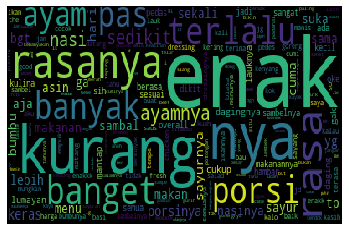

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud, interpolation='nearest', aspect='auto')
plt.axis("off")
plt.show()

In [40]:
data_test = pd.read_csv(r"test.csv", error_bad_lines=False)
data_test.head()

,meal_id,review
0,4674,belum sampe!!!
1,3616,sampai pukul 12.20 makanan belum sampai.
2,4648,enak sayang kulitnya keras bukan crunchy
3,6416,udah 2 hari lupa dikasi sendok mulu nih
4,3616,Belum datang sampai sekarang.


In [41]:
data_train.shape

(13347, 3)

In [42]:
data_test.shape

(7546, 2)

In [43]:
features = pd.DataFrame(data_train, columns=['meal_id', 'review'])
features.head()

,meal_id,review
0,2890,Ga ada rasa spesial. Sayur lodeh isinya cuma t...
1,3556,Ganti menu
2,3620,kurang sreg sama gorengannya aja sih. tempura ...
3,3531,Ayam dada nya agak keras dan nasinya cenderung...
4,3744,Pastanya enak banget....top deh :)


In [44]:
print(features.dtypes)

meal_id    object
review     object
dtype: object


In [45]:
target = pd.DataFrame(data_train, columns=['rating;;'])

In [46]:
target.head()

,rating;;
0,3.0;;
1,3.0;;
2,3.0;;
3,4.0;;
4,5.0;;


In [47]:
print(target.dtypes)

rating;;    object
dtype: object


In [48]:
X = features
y = target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
reviews = data_train.review.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naila\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


6185


['.',
 '?',
 'enak',
 'dan',
 'nya',
 'kurang',
 '!',
 '...',
 'banget',
 'terlalu',
 'banyak',
 'tapi',
 'agak',
 'rasanya',
 'pas',
 'Enak',
 'rasa',
 'ada',
 'sedikit',
 'porsi',
 'ini',
 'tidak',
 'ayamnya',
 'ayam',
 ':',
 'nasi',
 'keras',
 'di',
 'saya',
 'ga',
 'porsinya',
 'yg',
 'menu',
 'bgt',
 'sayur',
 '(',
 'juga',
 'tp',
 'lebih',
 'suka',
 'yang',
 'bisa',
 'makanan',
 ')',
 'untuk',
 'asin',
 'nasinya',
 'sayurnya',
 'hari',
 'ya']

In [34]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stop = stopword.remove(reviews)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['Ga', 'rasa', 'spesial', '.', 'Sayur', 'lodeh', 'isinya', 'cuma', 'terong', 'doang', 'Ganti', 'menu', 'kurang', 'sreg', 'sama', 'gorengannya', 'aja', 'sih', '.', 'tempura', 'japanese', 'food', 'ya', '?', 'Ayam', 'dada', 'nya', 'keras', 'nasinya', 'cenderung', 'sedikit', '.', 'Tapi', 'overall', 'enak', '.', 'Pastanya', 'enak', 'banget', '...', '.top', 'deh', ':', ')', 'Ko', 'ga', 'sesuai', 'jadwal', 'si', '?', 'Enak', 'Porsinya', 'ngenyangin', 'banget', 'Menu', 'FLOW', 'enak', 'nasi', 'kuningnya', 'wangi', 'enak', '.', 'sambalnya', 'jg', 'enak', '.', 'I', 'can', 'definitely', 'say', 'this', 'menu', 'is', 'one', 'of', 'my', 'fave', '!', 'Not', 'worth', 'the', 'money', 'Rasa', 'variasi', 'nya', 'cocok', 'saya', '.', 'Ayamnya', 'kurang', 'gurih', '.', 'Mungkin', 'kurang', 'lama', 'diungkepnya', 'kurang', 'empuk', '.', 'Bihunnya', 'jg', 'kurang', 'gurih', '...', 'daging', 'sapinya', 'keras', 'enak', 'bihunnya', 'dikit', 'bgt', 'Bihun', '&', 'telor', 'enak', 'tp', 'nugget', "'", 'a', 'kuran

In [31]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

6185


['.',
 '?',
 'enak',
 'dan',
 'nya',
 'kurang',
 '!',
 '...',
 'banget',
 'terlalu',
 'banyak',
 'tapi',
 'agak',
 'rasanya',
 'pas',
 'Enak',
 'rasa',
 'ada',
 'sedikit',
 'porsi',
 'ini',
 'tidak',
 'ayamnya',
 'ayam',
 ':',
 'nasi',
 'keras',
 'di',
 'saya',
 'ga',
 'porsinya',
 'yg',
 'menu',
 'bgt',
 'sayur',
 '(',
 'juga',
 'tp',
 'lebih',
 'suka',
 'yang',
 'bisa',
 'makanan',
 ')',
 'untuk',
 'asin',
 'nasinya',
 'sayurnya',
 'hari',
 'ya']

['Ga',
 'spesial',
 '.',
 'Sayur',
 'lodeh',
 'isinya',
 'terong',
 'doang',
 'Ganti',
 'menu',
 'sreg',
 'gorengannya',
 'aja',
 'sih',
 '.',
 'tempura',
 'japanese',
 'food',
 'ya',
 '?',
 'Ayam',
 'dada',
 'nya',
 'keras',
 'nasinya',
 'cenderung',
 '.',
 'Tapi',
 'overall',
 'enak',
 '.',
 'Pastanya',
 'enak',
 'banget',
 '...',
 '.top',
 'deh',
 ':',
 ')',
 'Ko',
 'ga',
 'sesuai',
 'jadwal',
 'si',
 '?',
 'Enak',
 'Porsinya',
 'ngenyangin',
 'banget',
 'Menu',
 'FLOW',
 'enak',
 'nasi',
 'kuningnya',
 'wangi',
 'enak',
 '.',
 'sambalnya',
 'jg',
 'enak',
 '.',
 'I',
 'definitely',
 'say',
 'menu',
 'one',
 'fave',
 '!',
 'Not',
 'worth',
 'money',
 'Rasa',
 'variasi',
 'nya',
 'cocok',
 '.',
 'Ayamnya',
 'gurih',
 '.',
 'Mungkin',
 'diungkepnya',
 'empuk',
 '.',
 'Bihunnya',
 'jg',
 'gurih',
 '...',
 'daging',
 'sapinya',
 'keras',
 'enak',
 'bihunnya',
 'dikit',
 'bgt',
 'Bihun',
 '&',
 'telor',
 'enak',
 'tp',
 'nugget',
 "'",
 'enak',
 'kya',
 'brsa',
 'asin',
 'Cukup',
 'enak'